# Análisis Exploratorio de Datos: Hurtos en el Transporte Público

Este repositorio contiene un análisis detallado de incidentes de hurto a personas en el transporte público, enfocado en identificar los veinte barrios con mayor incidencia de estos delitos. A través de visualizaciones y estadísticas descriptivas, se exploran patrones geográficos y temporales en la frecuencia de hurtos, proporcionando información relevante para el desarrollo de estrategias de prevención en las zonas más afectadas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib.dates as mdates
import matplotlib.font_manager as fm


In [ ]:
# Cargar el archivo CSV con codificación UTF-8
archivo_csv = "/content/hurto_a_persona_transporte_publico.csv"
df = pd.read_csv(archivo_csv, delimiter=';', encoding='utf-8')

# Mostrar los títulos (nombres de las columnas)
print(df.columns)


Index(['Fecha', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
       'nivel_academico', 'testigo', 'conducta', 'modalidad',
       'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',
       'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna',
       'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',
       'modelo', 'color', 'permiso', 'unidad_medida'],
      dtype='object')


<ipython-input-2-4381e11b43db>:3: DtypeWarning: Columns (0,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo_csv, delimiter=';', encoding='utf-8')


In [ ]:
títulos = df.columns.tolist()
print(títulos)

['Fecha', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad', 'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco', 'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte', 'nivel_academico', 'testigo', 'conducta', 'modalidad', 'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal', 'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna', 'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien', 'modelo', 'color', 'permiso', 'unidad_medida']


In [ ]:
df = df.dropna(subset=['nombre_barrio', 'lugar', 'Fecha'])


In [ ]:
df.head()

,Fecha,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida
0,30/11/2023,1.0,#¡NUM!,#¡NUM!,Mujer,41.0,Sin dato,Sin dato,Sin dato,Sin dato,...,10.0,Paradero de bus,Candelaria,Sin dato,Sin dato,Sin dato,-1.0,Sin dato,Sin dato,Sin dato
1,30/11/2023,1.0,#¡NUM!,#¡NUM!,Hombre,20.0,Sin dato,Sin dato,Sin dato,Sin dato,...,5.0,Estación del Metro,Castilla,Sin dato,Sin dato,Sin dato,-1.0,Sin dato,Sin dato,Sin dato
2,29/11/2023,1.0,#¡NUM!,#¡NUM!,Hombre,70.0,Sin dato,Sin dato,Sin dato,Sin dato,...,10.0,Estación del Metro,Candelaria,Sin dato,Sin dato,Sin dato,-1.0,Sin dato,Sin dato,Sin dato
3,29/11/2023,1.0,#¡NUM!,#¡NUM!,Mujer,25.0,Sin dato,Sin dato,Sin dato,Sin dato,...,14.0,Estación del Metro,Poblado,Sin dato,Sin dato,Sin dato,-1.0,Sin dato,Sin dato,Sin dato
4,29/11/2023,1.0,#¡NUM!,#¡NUM!,Mujer,32.0,Sin dato,Sin dato,Sin dato,Sin dato,...,16.0,Estación del Metro,Manrique,Sin dato,Sin dato,Sin dato,-1.0,Sin dato,Sin dato,Sin dato


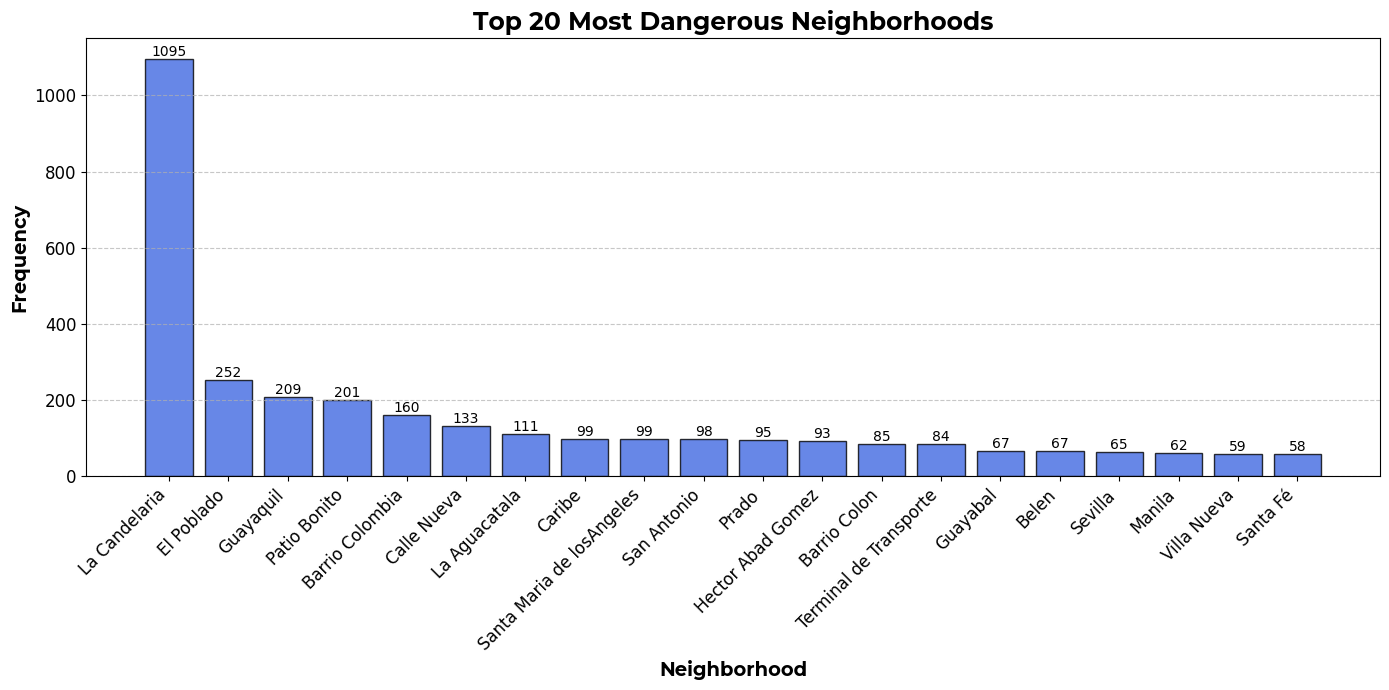

In [ ]:
# Contar la frecuencia total de cada barrio
barrio_counts = df['nombre_barrio'].value_counts().reset_index()
barrio_counts.columns = ['nombre_barrio', 'counts']
top_20_barrios = barrio_counts.head(20)

# Gráfico de nombre_barrio
plt.figure(figsize=(14, 7))
bars = plt.bar(top_20_barrios['nombre_barrio'], top_20_barrios['counts'], color='royalblue', edgecolor='black', alpha=0.8)


# Cargar la fuente Montserrat
font_path = 'Montserrat-Bold.ttf'
fm.fontManager.addfont(font_path)

# Configurar la fuente
montserrat_bold = fm.FontProperties(fname=font_path)


# Añadir títulos y etiquetas
plt.title('Top 20 Most Dangerous Neighborhoods', fontproperties=montserrat_bold, fontsize=18)
plt.xlabel('Neighborhood',fontproperties=montserrat_bold, fontsize=14)
plt.ylabel('Frequency', fontproperties=montserrat_bold, fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-13-c32b55626be9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Estación del Metro', 'Metro Station')
<ipython-input-13-c32b55626be9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Bus de servicioPublico', 'Public service bus')
<ipython-input-13-c32b55626be9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

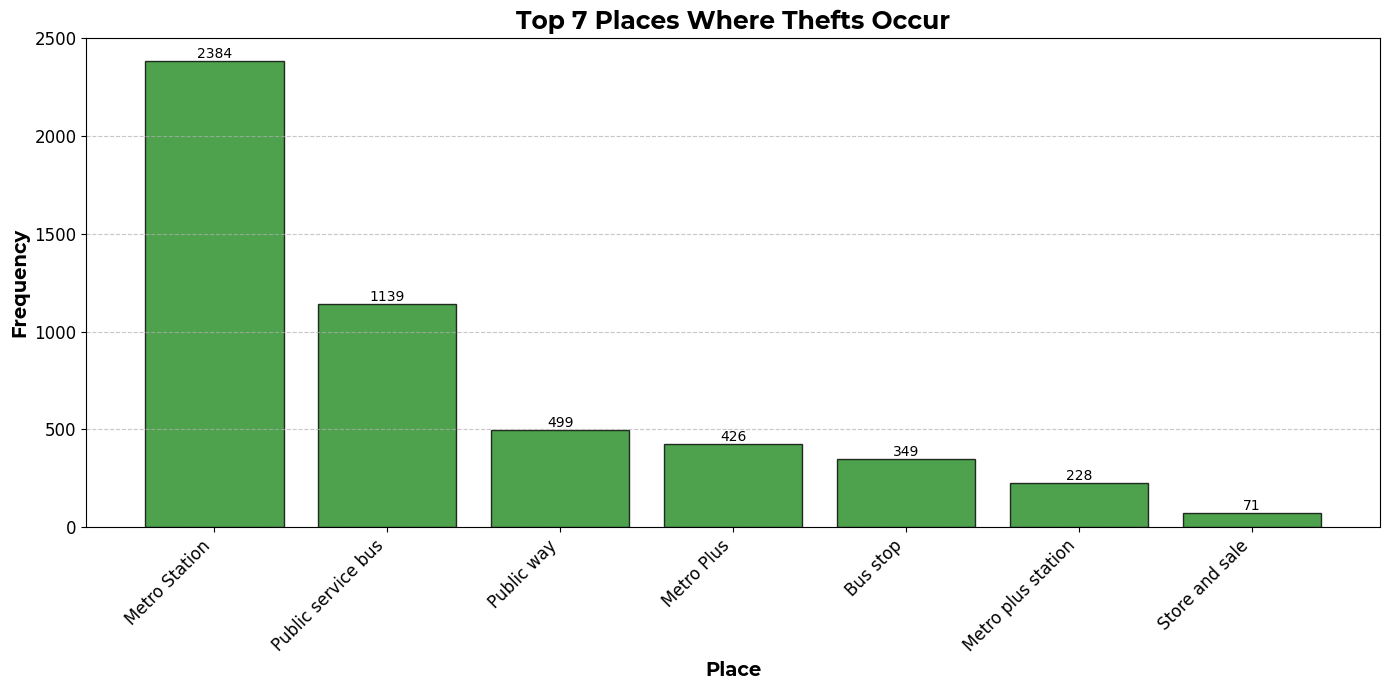

In [ ]:

# Contar la frecuencia total de cada lugar
lugar_counts = df['lugar'].value_counts().reset_index()
lugar_counts.columns = ['lugar', 'counts']
top_20_lugares = lugar_counts.head(7)

top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Estación del Metro', 'Metro Station')
top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Bus de servicioPublico', 'Public service bus')
top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Vía Publica', 'Public way')
top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Metro Plus', 'Metro Plus')
top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Paradero de bus', 'Bus stop')
top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Estación del Metro plus', 'Metro plus station')
top_20_lugares['lugar'] = top_20_lugares['lugar'].replace('Almacen tienda y otro', 'Store and sale')

# Gráfico de lugar
plt.figure(figsize=(14, 7))
bars = plt.bar(top_20_lugares['lugar'], top_20_lugares['counts'], color='forestgreen', edgecolor='black', alpha=0.8)

# Cargar la fuente Montserrat
font_path = 'Montserrat-Bold.ttf'
fm.fontManager.addfont(font_path)

# Configurar la fuente
montserrat_bold = fm.FontProperties(fname=font_path)


# Add titles and labels
plt.title('Top 7 Places Where Thefts Occur', fontproperties=montserrat_bold, fontsize=18)
plt.xlabel('Place', fontproperties=montserrat_bold, fontsize=14)
plt.ylabel('Frequency', fontproperties=montserrat_bold, fontsize=14)


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-60-28d14c91d9c6>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected_places = filtered_data.groupby('nombre_barrio').apply(lambda x: x.nlargest(3, 'counts')).reset_index(drop=True)


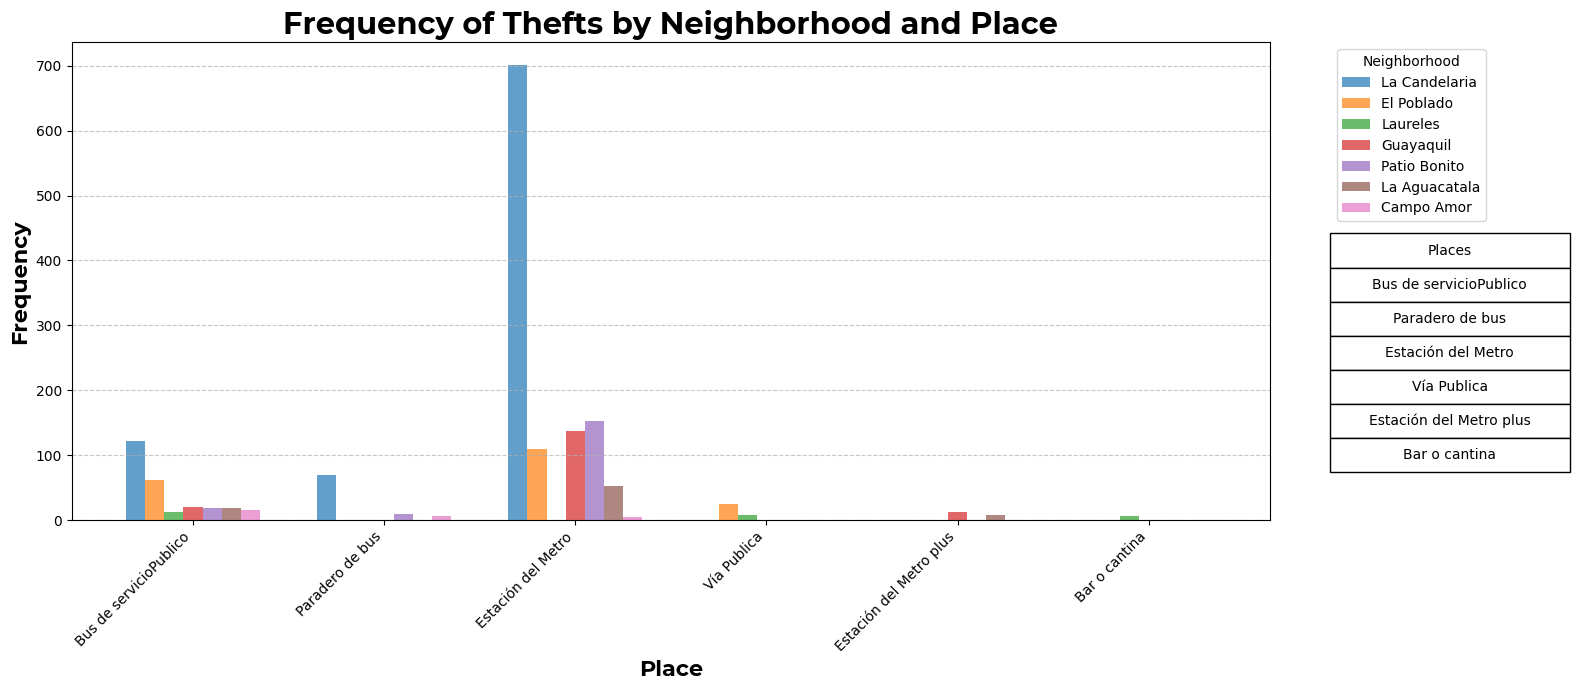

In [ ]:
# Count the total frequency of each neighborhood and place combination
barrio_lugar_counts = df.groupby(['nombre_barrio', 'lugar']).size().reset_index(name='counts')

# Get the 7 most common neighborhoods
top_barrios = barrio_lugar_counts['nombre_barrio'].value_counts().head(7).index.tolist()

# Filter the data to include only the most common neighborhoods
filtered_data = barrio_lugar_counts[barrio_lugar_counts['nombre_barrio'].isin(top_barrios)]

# Select the places with the most data per neighborhood
selected_places = filtered_data.groupby('nombre_barrio').apply(lambda x: x.nlargest(3, 'counts')).reset_index(drop=True)

# Create grouped bar chart
plt.figure(figsize=(16, 7))  # Figure size
bar_width = 0.1  # Width of the bars
x_labels = selected_places['lugar'].unique()  # Get unique places

# Create an index for the bar positions
indices = range(len(x_labels))

# Create a dictionary to store counts by neighborhood
counts_dict = {barrio: [] for barrio in top_barrios}

# Fill the dictionary with counts
for barrio in top_barrios:
    subset = selected_places[selected_places['nombre_barrio'] == barrio]
    counts_dict[barrio] = [subset[subset['lugar'] == lugar]['counts'].values[0] if lugar in subset['lugar'].values else 0 for lugar in x_labels]

# Create bars for each neighborhood
for i, barrio in enumerate(top_barrios):
    plt.bar([x + bar_width * i - bar_width * (len(top_barrios) - 1) / 2 for x in indices],
             counts_dict[barrio],
             width=bar_width,
             label=barrio,
             alpha=0.7)


# Cargar la fuente Montserrat
font_path = 'Montserrat-Bold.ttf'
fm.fontManager.addfont(font_path)

# Configurar la fuente
montserrat_bold = fm.FontProperties(fname=font_path)


# Add titles and labels
plt.title('Frequency of Thefts by Neighborhood and Place', fontproperties=montserrat_bold, fontsize=22)
plt.xlabel('Place', fontproperties=montserrat_bold, fontsize=16)
plt.ylabel('Frequency', fontproperties=montserrat_bold, fontsize=16)

# Adjust the alignment of the place labels
plt.xticks(indices, x_labels, rotation=45, ha='right', va='top')

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create additional table with selected places
plt.table(cellText=[[lugar] for lugar in x_labels],
          colLabels=['Places'],
          cellLoc='center',
          loc='right',
          bbox=[1.05, 0.1, 0.2, 0.5])  # Adjust position and size of the table

# Adjust margins and show the plot
plt.tight_layout()
plt.show()


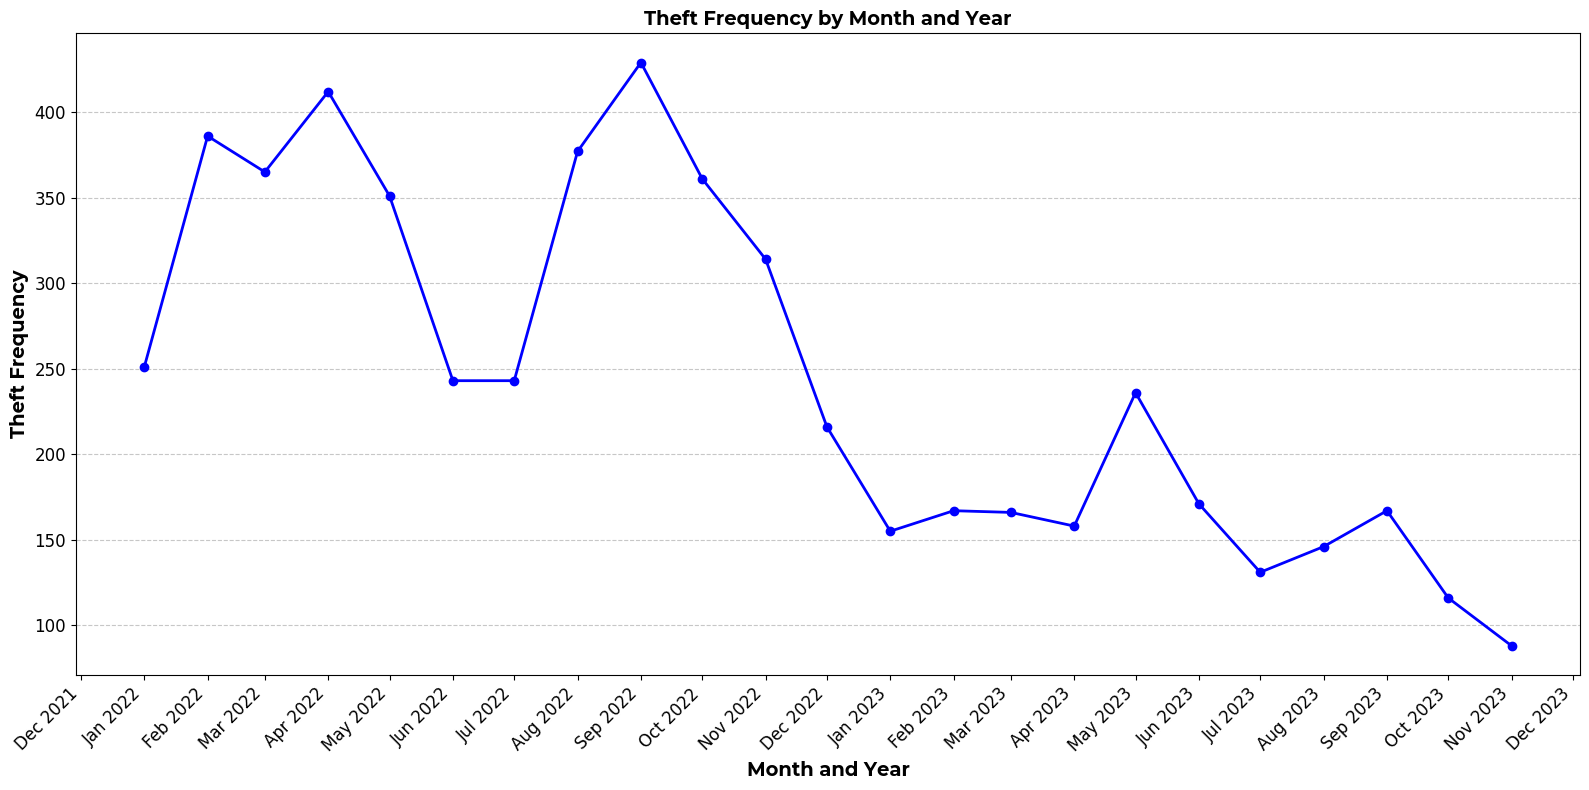

In [ ]:
# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Extraer mes y año
df['Mes'] = df['Fecha'].dt.to_period('M')

# Contar los hurtos por mes y año
hurto_counts = df['Mes'].value_counts().reset_index()
hurto_counts.columns = ['Mes', 'counts']
hurto_counts.sort_values('Mes', inplace=True)

# Convertir la columna 'Mes' a formato de fecha
hurto_counts['Mes'] = hurto_counts['Mes'].dt.to_timestamp()

# Crear el gráfico de línea
plt.figure(figsize=(16, 8))
plt.plot(hurto_counts['Mes'], hurto_counts['counts'], marker='o', color='blue', linewidth=2)

# Formatear el eje x con fechas
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right', fontsize=12)

# Format the y-axis
plt.yticks(fontsize=12)
plt.ylabel('Theft Frequency', fontproperties=montserrat_bold, fontsize=14)

# Load the Montserrat font
font_path = 'Montserrat-Bold.ttf'
fm.fontManager.addfont(font_path)

# Set the font
montserrat_bold = fm.FontProperties(fname=font_path)

# Add title and labels
plt.title('Theft Frequency by Month and Year',  fontproperties=montserrat_bold, fontsize=14)
plt.xlabel('Month and Year',  fontproperties=montserrat_bold, fontsize=14)

# Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()